In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import pycaret as pc

In [5]:
import sklearn as sk

In [6]:
from pycaret.nlp import *

In [7]:
np.__version__

'1.22.3'

In [8]:
pd.__version__

'1.3.5'

In [9]:
pc.__version__

'2.3.10'

In [10]:
sk.__version__

'0.23.2'

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
data = pd.read_csv("./kiva.csv", sep=',', decimal='.', verbose= True, engine='c') 

Tokenization took: 22.66 ms
Type conversion took: 29.01 ms
Parser memory cleanup took: 0.00 ms


In [13]:
data.shape

(6818, 7)

In [14]:
data.head()

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [15]:
data = data.sample(1000, random_state=786).reset_index(drop=True)

In [16]:
data.shape

(1000, 7)

In [17]:
exp_nlp101 = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 101,
                   log_experiment = True,
                   experiment_name = 'EX001')

Description,Value
session_id,101
Documents,1000
Vocab Size,4636
Custom Stopwords,True


### [Evaluate Topic Models: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

### [Evaluating Topic Models](https://www.youtube.com/watch?v=UkmIljRIG_M)

### [Latent Dirichlet Allocation](https://radimrehurek.com/gensim/models/ldamodel.html)

In [18]:
lda = create_model('lda', num_topics = 4, multi_core = True)

In [19]:
print(lda)

LdaModel(num_terms=4636, num_topics=4, decay=0.5, chunksize=100)


In [20]:
lda_results = assign_model(lda)

In [21]:
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.006294,0.006075,0.006168,0.981463,Topic 3,0.98
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.005976,0.005814,0.005796,0.982413,Topic 3,0.98
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.568293,0.007493,0.007742,0.416472,Topic 0,0.57
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.135798,0.007109,0.007171,0.849923,Topic 3,0.85
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.006575,0.005752,0.006018,0.981655,Topic 3,0.98


In [22]:
plot_model()

In [23]:
plot_model(plot = 'bigram')

In [24]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [25]:
plot_model(lda, plot = 'topic_distribution')

In [26]:
plot_model(lda, plot = 'tsne')

### [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html)

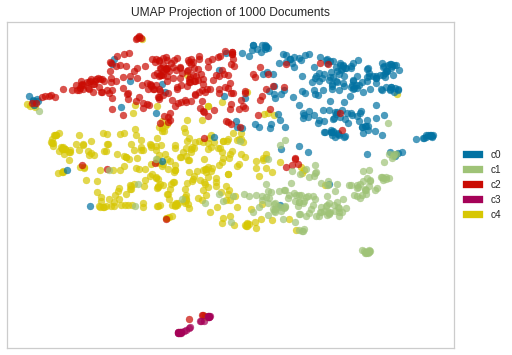

In [27]:
plot_model(lda, plot = 'umap')

In [28]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [29]:
save_model(lda,'./models/NLP01')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x7f44e59ba130>,
 './models/NLP01.pkl')

In [30]:
saved_lda = load_model('./models/NLP01')

Model Sucessfully Loaded


In [31]:
print(saved_lda)

LdaModel(num_terms=4636, num_topics=4, decay=0.5, chunksize=100)


In [32]:
#!m/lflow ui 

________________________________

## Using LSI

In [33]:
lsi_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 102,
                   log_experiment = True,
                   experiment_name = 'EX002')

Description,Value
session_id,102
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [34]:
lsi = create_model('lsi', num_topics = 4, multi_core = True)

In [35]:
lsi_results = assign_model(lsi)

In [36]:
lsi_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,1.663994,-0.906734,-0.318654,1.401194,Topic 0
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,1.631765,-0.804704,0.424279,-0.299505,Topic 0
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,2.422471,-0.606789,0.090218,0.377423,Topic 0
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,1.336815,-0.750581,-0.177995,0.820442,Topic 0
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,1.163876,-0.905900,-0.117260,1.259037,Topic 3


In [37]:
plot_model(lsi)

In [38]:
plot_model(lsi, plot = 'bigram')

In [39]:
plot_model(lsi, plot = 'frequency', topic_num = 'Topic 0')

In [40]:
plot_model(lsi, plot = 'topic_distribution')

In [41]:
plot_model(lsi, plot = 'tsne')

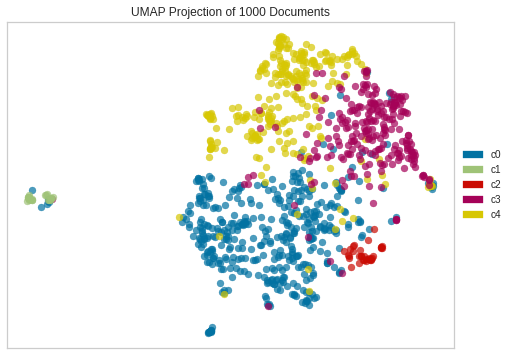

In [42]:
plot_model(lsi, plot = 'umap')

## Using HDP

In [43]:
hdp_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 103,
                   log_experiment = True,
                   experiment_name = 'EX003')

Description,Value
session_id,103
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [44]:
hdp = create_model('hdp', num_topics = 4, multi_core = True)

In [45]:
hdp_results = assign_model(hdp)

In [46]:
hdp_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.986071,0.000000,0.000000,0.000000,Topic 0
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.721216,0.271272,0.000000,0.000000,Topic 0
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.983211,0.000000,0.000000,0.000000,Topic 0
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.744704,0.000000,0.000000,0.243234,Topic 0
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.508053,0.189856,0.298672,0.000000,Topic 0


In [47]:
plot_model(hdp)

In [48]:
plot_model(hdp, plot = 'bigram')

In [49]:
plot_model(hdp, plot = 'frequency', topic_num = 'Topic 0')

In [50]:
plot_model(hdp, plot = 'topic_distribution')

In [51]:
plot_model(hdp, plot = 'tsne')

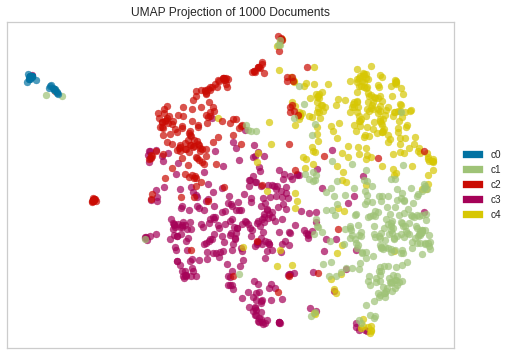

In [52]:
plot_model(hdp, plot = 'umap')

## Using RP

In [53]:
lsi_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 103,
                   log_experiment = True,
                   experiment_name = 'EX004')

Description,Value
session_id,103
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [54]:
rp = create_model('rp', num_topics = 4, multi_core = True)

In [55]:
rp_results = assign_model(rp)

In [56]:
rp_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,-1.5,0.5,-1.5,-3.5,Topic 1
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,-5.5,1.5,8.5,5.5,Topic 2
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,1.0,0.0,2.0,-1.0,Topic 2
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,-2.5,1.5,-0.5,2.5,Topic 3
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.5,-2.5,-0.5,6.5,Topic 3


In [57]:
plot_model(rp)

In [58]:
plot_model(rp, plot = 'bigram')

In [59]:
plot_model(rp, plot = 'frequency', topic_num = 'Topic 0')

In [60]:
plot_model(rp, plot = 'topic_distribution')

In [61]:
plot_model(rp, plot = 'tsne')

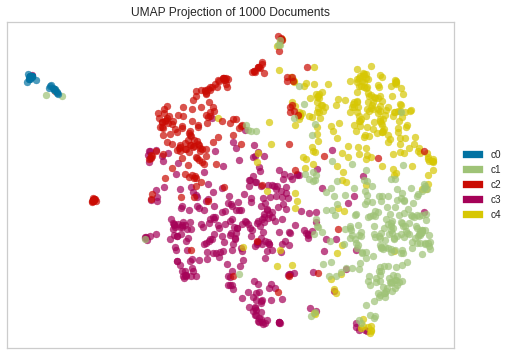

In [62]:
plot_model(rp, plot = 'umap')